<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [3]:
data = np.load('quickdraw10.npz')

In [4]:
data

In [5]:
path = 'quickdraw10.npz'

In [26]:
def load_quickdraw10(path):
    # Load dataset
    data = np.load(path)
    
    # Split into X & y
    X = data['arr_0']
    y = data['arr_1']
    
    # normalize X
    X = X.astype('float')/255
    
    # Randomly shuffle X & y
    X, y = shuffle(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
    
    # Split into train, test sets
    return X_train, y_train, X_test, y_test

In [27]:
X_train, y_train, X_test, y_test = load_quickdraw10(path)

In [28]:
# Double checking function worked properly
X_train.max()

1.0

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

Process from notes:

0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly initialize weights
2. Implement forward propagation to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a cost function $J(\theta)$
4. Implement backpropagation to compute partial derivatives $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use gradient descent (or other advanced optimizer) with backpropagation to minimize $J(\theta)$ as a function of parameters $\theta\$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

In [48]:
##### Your Code Here #####
    
def create_model(lr=.01):  
    opt = SGD(learning_rate=lr)

    model = Sequential([
          # hidden layer 1 
          Dense(100, activation='relu', input_dim=784),
          # hidden layer 2 
          Dense(32, activation='relu'),
          # output layer 
          Dense(10, activation='softmax')

    ])

    model.compile(optimizer=opt, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [50]:
model = create_model()
model_test = model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test),
          epochs=30)

Epoch 1/30
2094/2094 [==============================] - 3s 2ms/step - loss: 1.4977 - accuracy: 0.5169 - val_loss: 0.8538 - val_accuracy: 0.7437
Epoch 2/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8072 - accuracy: 0.7644 - val_loss: 0.7431 - val_accuracy: 0.7828
Epoch 3/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.7157 - accuracy: 0.7901 - val_loss: 0.6878 - val_accuracy: 0.7984
Epoch 4/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.6575 - accuracy: 0.8103 - val_loss: 0.6532 - val_accuracy: 0.8069
Epoch 5/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6165 - accuracy: 0.8208 - val_loss: 0.6166 - val_accuracy: 0.8169
Epoch 6/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.5890 - accuracy: 0.8283 - val_loss: 0.5920 - val_accuracy: 0.8247
Epoch 7/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.5486 - accuracy: 0.8411 - val_loss: 0.5702 - val_accuracy:

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [53]:
# BIG
model = create_model()
bt_large = model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
           batch_size=500, 
          epochs=10)

Epoch 1/10
134/134 [==============================] - 1s 5ms/step - loss: 2.2614 - accuracy: 0.1814 - val_loss: 1.9663 - val_accuracy: 0.4121
Epoch 2/10
134/134 [==============================] - 1s 4ms/step - loss: 1.8617 - accuracy: 0.4537 - val_loss: 1.5634 - val_accuracy: 0.5472
Epoch 3/10
134/134 [==============================] - 1s 5ms/step - loss: 1.4871 - accuracy: 0.5660 - val_loss: 1.3087 - val_accuracy: 0.6146
Epoch 4/10
134/134 [==============================] - 1s 4ms/step - loss: 1.2706 - accuracy: 0.6240 - val_loss: 1.1711 - val_accuracy: 0.6508
Epoch 5/10
134/134 [==============================] - 1s 4ms/step - loss: 1.1480 - accuracy: 0.6581 - val_loss: 1.0845 - val_accuracy: 0.6738
Epoch 6/10
134/134 [==============================] - 1s 4ms/step - loss: 1.0679 - accuracy: 0.6810 - val_loss: 1.0249 - val_accuracy: 0.6948
Epoch 7/10
134/134 [==============================] - 1s 5ms/step - loss: 1.0162 - accuracy: 0.6965 - val_loss: 0.9815 - val_accuracy: 0.7083
Epoch 

In [56]:
# Medium
model = create_model()
bt_med = model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
           batch_size=250, 
          epochs=10)

Epoch 1/10
268/268 [==============================] - 1s 4ms/step - loss: 2.1044 - accuracy: 0.2673 - val_loss: 1.4790 - val_accuracy: 0.5548
Epoch 2/10
268/268 [==============================] - 1s 3ms/step - loss: 1.3749 - accuracy: 0.5838 - val_loss: 1.1621 - val_accuracy: 0.6506
Epoch 3/10
268/268 [==============================] - 1s 3ms/step - loss: 1.1224 - accuracy: 0.6661 - val_loss: 1.0253 - val_accuracy: 0.6955
Epoch 4/10
268/268 [==============================] - 1s 3ms/step - loss: 0.9988 - accuracy: 0.7076 - val_loss: 0.9507 - val_accuracy: 0.7198
Epoch 5/10
268/268 [==============================] - 1s 3ms/step - loss: 0.9339 - accuracy: 0.7272 - val_loss: 0.9056 - val_accuracy: 0.7318
Epoch 6/10
268/268 [==============================] - 1s 3ms/step - loss: 0.8991 - accuracy: 0.7376 - val_loss: 0.8749 - val_accuracy: 0.7431
Epoch 7/10
268/268 [==============================] - 1s 3ms/step - loss: 0.8720 - accuracy: 0.7479 - val_loss: 0.8514 - val_accuracy: 0.7489
Epoch 

In [57]:
# Tiny
model = create_model()
bt_tiny = model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
           batch_size=1, 
          epochs=10)

Epoch 1/10
67000/67000 [==============================] - 71s 1ms/step - loss: 0.8528 - accuracy: 0.7302 - val_loss: 0.5652 - val_accuracy: 0.8273
Epoch 2/10
67000/67000 [==============================] - 68s 1ms/step - loss: 0.5277 - accuracy: 0.8377 - val_loss: 0.5208 - val_accuracy: 0.8422
Epoch 3/10
67000/67000 [==============================] - 72s 1ms/step - loss: 0.4679 - accuracy: 0.8567 - val_loss: 0.5207 - val_accuracy: 0.8400
Epoch 4/10
67000/67000 [==============================] - 68s 1ms/step - loss: 0.4158 - accuracy: 0.8730 - val_loss: 0.5081 - val_accuracy: 0.8488
Epoch 5/10
67000/67000 [==============================] - 74s 1ms/step - loss: 0.3938 - accuracy: 0.8791 - val_loss: 0.5054 - val_accuracy: 0.8514
Epoch 6/10
67000/67000 [==============================] - 70s 1ms/step - loss: 0.3616 - accuracy: 0.8889 - val_loss: 0.5101 - val_accuracy: 0.8528
Epoch 7/10
67000/67000 [==============================] - 76s 1ms/step - loss: 0.3399 - accuracy: 0.8953 - val_loss: 0

In [58]:
# Small
model = create_model()
bt_small = model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
           batch_size=10, 
          epochs=10)

Epoch 1/10
6700/6700 [==============================] - 11s 2ms/step - loss: 1.1665 - accuracy: 0.6314 - val_loss: 0.6807 - val_accuracy: 0.7975
Epoch 2/10
6700/6700 [==============================] - 8s 1ms/step - loss: 0.6405 - accuracy: 0.8152 - val_loss: 0.5745 - val_accuracy: 0.8290
Epoch 3/10
6700/6700 [==============================] - 9s 1ms/step - loss: 0.5365 - accuracy: 0.8421 - val_loss: 0.5237 - val_accuracy: 0.8458
Epoch 4/10
6700/6700 [==============================] - 8s 1ms/step - loss: 0.4822 - accuracy: 0.8578 - val_loss: 0.5055 - val_accuracy: 0.8497
Epoch 5/10
6700/6700 [==============================] - 8s 1ms/step - loss: 0.4400 - accuracy: 0.8680 - val_loss: 0.4877 - val_accuracy: 0.8559
Epoch 6/10
6700/6700 [==============================] - 8s 1ms/step - loss: 0.4081 - accuracy: 0.8806 - val_loss: 0.4860 - val_accuracy: 0.8574
Epoch 7/10
6700/6700 [==============================] - 8s 1ms/step - loss: 0.3839 - accuracy: 0.8852 - val_loss: 0.4883 - val_accuracy

In [61]:
# Little Bigger than Small
model = create_model()
bt_3 = model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
           batch_size=125, 
          epochs=10)

Epoch 1/10
536/536 [==============================] - 2s 3ms/step - loss: 1.9497 - accuracy: 0.3593 - val_loss: 1.1911 - val_accuracy: 0.6371
Epoch 2/10
536/536 [==============================] - 1s 3ms/step - loss: 1.1187 - accuracy: 0.6614 - val_loss: 0.9582 - val_accuracy: 0.7107
Epoch 3/10
536/536 [==============================] - 1s 2ms/step - loss: 0.9322 - accuracy: 0.7249 - val_loss: 0.8742 - val_accuracy: 0.7390
Epoch 4/10
536/536 [==============================] - 1s 2ms/step - loss: 0.8596 - accuracy: 0.7474 - val_loss: 0.8262 - val_accuracy: 0.7546
Epoch 5/10
536/536 [==============================] - 1s 3ms/step - loss: 0.8161 - accuracy: 0.7596 - val_loss: 0.7921 - val_accuracy: 0.7664
Epoch 6/10
536/536 [==============================] - 1s 2ms/step - loss: 0.7841 - accuracy: 0.7712 - val_loss: 0.7665 - val_accuracy: 0.7747
Epoch 7/10
536/536 [==============================] - 1s 2ms/step - loss: 0.7466 - accuracy: 0.7823 - val_loss: 0.7440 - val_accuracy: 0.7796
Epoch 

In [64]:
model = create_model()
bt_default = model.fit(X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10)

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 1.4579 - accuracy: 0.5283 - val_loss: 0.8576 - val_accuracy: 0.7479
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.8214 - accuracy: 0.7617 - val_loss: 0.7447 - val_accuracy: 0.7798
Epoch 3/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.7162 - accuracy: 0.7938 - val_loss: 0.6860 - val_accuracy: 0.8008
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.6494 - accuracy: 0.8132 - val_loss: 0.6325 - val_accuracy: 0.8140
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.6003 - accuracy: 0.8244 - val_loss: 0.6150 - val_accuracy: 0.8183
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.5634 - accuracy: 0.8359 - val_loss: 0.5772 - val_accuracy: 0.8288
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.5363 - accuracy: 0.8441 - val_loss: 0.5601 - val_accuracy:

In [66]:
batch_sizes = []

for exp, result in zip([bt_large, bt_med, bt_default, bt_3, bt_small, bt_tiny], ["500_", "250_", "125_","32_", "8_", "1_" ]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.902973,0.354537,1.484429,0.558121,0,500_
1,1.278813,0.629896,1.139583,0.671909,1,500_
2,1.067576,0.694731,1.011724,0.706091,2,500_
3,0.975016,0.719478,0.945377,0.723576,3,500_
4,0.922648,0.734090,0.904236,0.736818,4,500_


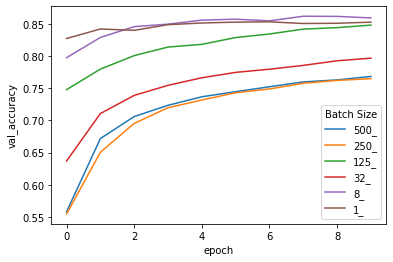

In [68]:

sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

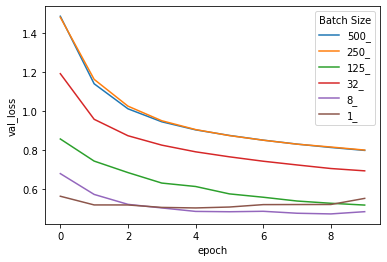

In [69]:

sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

A batch size of 1 had instantly the best accuracy score but it took FOREVER to run. The batch size of 10 ran much faster and actually had a better model. The larger batch sizes were not as good however.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [71]:
model_1 = create_model(lr=1)
m_1 = model.fit(X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10)

Epoch 1/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.4518 - accuracy: 0.8694 - val_loss: 0.5140 - val_accuracy: 0.8494
Epoch 2/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.4373 - accuracy: 0.8748 - val_loss: 0.5026 - val_accuracy: 0.8530
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.4240 - accuracy: 0.8768 - val_loss: 0.4945 - val_accuracy: 0.8553
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.4101 - accuracy: 0.8818 - val_loss: 0.4953 - val_accuracy: 0.85470s - loss: 0.410
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3976 - accuracy: 0.8855 - val_loss: 0.4966 - val_accuracy: 0.8548
Epoch 6/10
2094/2094 [==============================] - 4s 2ms/step - loss: 0.3868 - accuracy: 0.8881 - val_loss: 0.4841 - val_accuracy: 0.8573
Epoch 7/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3766 - accuracy: 0.8911 - val_loss: 0.4900

In [73]:
model_2 = create_model(lr=.1)
m_2 = model.fit(X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10)

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3404 - accuracy: 0.9017 - val_loss: 0.4810 - val_accuracy: 0.8615
Epoch 2/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3319 - accuracy: 0.9061 - val_loss: 0.4886 - val_accuracy: 0.8579
Epoch 3/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.3245 - accuracy: 0.9069 - val_loss: 0.4883 - val_accuracy: 0.8606
Epoch 4/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.9084 - val_loss: 0.4951 - val_accuracy: 0.8589
Epoch 5/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3095 - accuracy: 0.9108 - val_loss: 0.5004 - val_accuracy: 0.8579
Epoch 6/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3030 - accuracy: 0.9123 - val_loss: 0.4877 - val_accuracy: 0.8598
Epoch 7/10
2094/2094 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.9143 - val_loss: 0.5024 - val_accuracy:

In [74]:
model_3 = create_model(lr=.01)
m_3 = model.fit(X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10)

Epoch 1/10
2094/2094 [==============================] - 4s 2ms/step - loss: 0.2715 - accuracy: 0.9221 - val_loss: 0.5085 - val_accuracy: 0.8591
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.2661 - accuracy: 0.9241 - val_loss: 0.5094 - val_accuracy: 0.8586
Epoch 3/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.2599 - accuracy: 0.9259 - val_loss: 0.5108 - val_accuracy: 0.8592
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.2551 - accuracy: 0.9273 - val_loss: 0.5138 - val_accuracy: 0.8600
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.2495 - accuracy: 0.9288 - val_loss: 0.5235 - val_accuracy: 0.8580
Epoch 6/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.2435 - accuracy: 0.9308 - val_loss: 0.5322 - val_accuracy: 0.8572
Epoch 7/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.2390 - accuracy: 0.9313 - val_loss: 0.5306 - val_accuracy:

In [75]:
model_4 = create_model(lr=.001)
m_4 = model.fit(X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10)

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.2205 - accuracy: 0.9374 - val_loss: 0.5505 - val_accuracy: 0.8573
Epoch 2/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.2152 - accuracy: 0.9395 - val_loss: 0.5560 - val_accuracy: 0.8545
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9402 - val_loss: 0.5680 - val_accuracy: 0.8535
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.2062 - accuracy: 0.9414 - val_loss: 0.5700 - val_accuracy: 0.8555
Epoch 5/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.2017 - accuracy: 0.9428 - val_loss: 0.5806 - val_accuracy: 0.8505
Epoch 6/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1974 - accuracy: 0.9440 - val_loss: 0.5862 - val_accuracy: 0.8511
Epoch 7/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1936 - accuracy: 0.9454 - val_loss: 0.5930 - val_accuracy:

In [76]:
model_5 = create_model(lr=.0001)
m_5 = model.fit(X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10)

Epoch 1/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1771 - accuracy: 0.9502 - val_loss: 0.6527 - val_accuracy: 0.8449
Epoch 2/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1738 - accuracy: 0.9509 - val_loss: 0.6339 - val_accuracy: 0.8488
Epoch 3/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1702 - accuracy: 0.9528 - val_loss: 0.6346 - val_accuracy: 0.8497
Epoch 4/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.1663 - accuracy: 0.9540 - val_loss: 0.6399 - val_accuracy: 0.8489
Epoch 5/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1629 - accuracy: 0.9540 - val_loss: 0.6500 - val_accuracy: 0.8493
Epoch 6/10
2094/2094 [==============================] - 3s 1ms/step - loss: 0.1594 - accuracy: 0.9556 - val_loss: 0.6637 - val_accuracy: 0.8454
Epoch 7/10
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1563 - accuracy: 0.9565 - val_loss: 0.6622 - val_accuracy:

In [82]:
rates = []

for exp, result in zip([m_1, m_2, m_3, m_4, m_5], ["1_", ".1_", ".01_", ".001_", ".0001_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result

    rates.append(df)

df = pd.concat(rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.451837,0.869403,0.514020,0.849394,0,1_
1,0.437254,0.874761,0.502602,0.853000,1,1_
2,0.423963,0.876806,0.494542,0.855273,2,1_
3,0.410089,0.881836,0.495258,0.854727,3,1_
4,0.397614,0.885537,0.496639,0.854818,4,1_


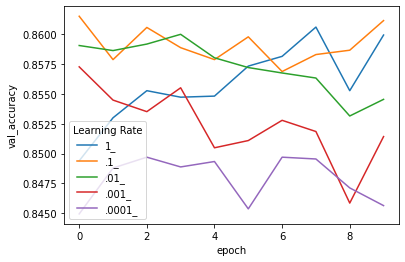

In [84]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

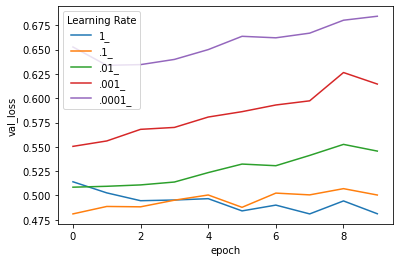

In [85]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [87]:
def create_model_1(lr=.01):  

    opt = tf.keras.optimizers.Adamax(
        learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
        name='Adamax', **kwargs)

    model = Sequential([
          # hidden layer 1 
          Dense(100, activation='relu', input_dim=784),
          # hidden layer 2 
          Dense(32, activation='relu'),
          # output layer 
          Dense(10, activation='softmax')

    ])

    model.compile(optimizer=opt, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_A = create_model()
model_Adamax = model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test),
          epochs=30)

Epoch 1/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.3150 - accuracy: 0.9082 - val_loss: 0.4934 - val_accuracy: 0.8608
Epoch 2/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.3076 - accuracy: 0.9104 - val_loss: 0.5096 - val_accuracy: 0.8557
Epoch 3/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3013 - accuracy: 0.9131 - val_loss: 0.5085 - val_accuracy: 0.8570
Epoch 4/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9145 - val_loss: 0.5108 - val_accuracy: 0.8562oss: 0.2
Epoch 5/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.9163 - val_loss: 0.5055 - val_accuracy: 0.8580
Epoch 6/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.2820 - accuracy: 0.9187 - val_loss: 0.5154 - val_accuracy: 0.8572
Epoch 7/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.2760 - accuracy: 0.9201 - val_loss: 0.5131 - val_a

In [88]:
def create_model_2(lr=.01):  

    opt = tf.keras.optimizers.Adadelta(
        learning_rate=0.001, rho=0.95, epsilon=1e-07, name='Adadelta')

    model = Sequential([
          # hidden layer 1 
          Dense(100, activation='relu', input_dim=784),
          # hidden layer 2 
          Dense(32, activation='relu'),
          # output layer 
          Dense(10, activation='softmax')

    ])

    model.compile(optimizer=opt, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_Ad = create_model()
model_Adadelta = model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test),
          epochs=30)

Epoch 1/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1677 - accuracy: 0.9530 - val_loss: 0.6565 - val_accuracy: 0.8493
Epoch 2/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.1652 - accuracy: 0.9529 - val_loss: 0.6625 - val_accuracy: 0.8475
Epoch 3/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.1611 - accuracy: 0.9544 - val_loss: 0.6876 - val_accuracy: 0.8453
Epoch 4/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.1577 - accuracy: 0.9551 - val_loss: 0.6801 - val_accuracy: 0.8474
Epoch 5/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.1547 - accuracy: 0.9566 - val_loss: 0.6878 - val_accuracy: 0.8478
Epoch 6/30
2094/2094 [==============================] - 3s 1ms/step - loss: 0.1518 - accuracy: 0.9574 - val_loss: 0.6973 - val_accuracy: 0.8458
Epoch 7/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.1487 - accuracy: 0.9587 - val_loss: 0.6983 - val_accuracy:

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


